<a href="https://colab.research.google.com/github/pouthusridhar-oss/my-sentimental-analysis/blob/main/logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.75

Confusion Matrix:
 [[3 1]
 [0 0]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.00      0.00      0.00         0

    accuracy                           0.75         4
   macro avg       0.50      0.38      0.43         4
weighted avg       1.00      0.75      0.86         4



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


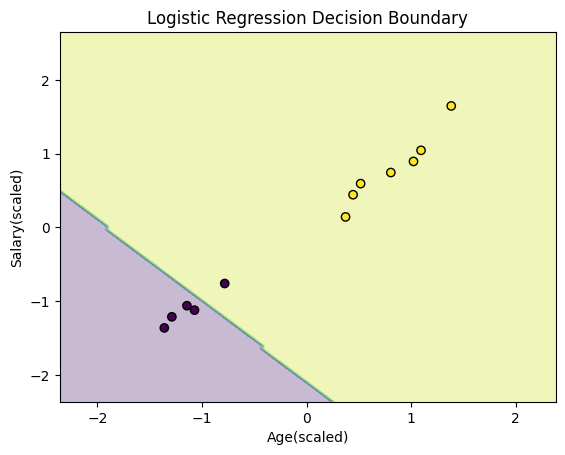

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
data = {
    "Age":[22,25,47,52,46,56,48,55,23,26,30,60],
    "Salary":[20000,30000,80000,90000,70000,100000,85000,95000,25000,28000,40000,120000],
    "Purchased":[0,0,1,1,1,1,1,1,0,0,0,1]
}
df = pd.DataFrame(data)
X = df[["Age","Salary"]]
y = df["Purchased"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("\nConfusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))
x_min, x_max = X_scaled[:,0].min() - 1,X_scaled[:,0].max() +1
y_min, y_max = X_scaled[:,1].min() - 1,X_scaled[:,1].max() +1
xx,yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                    np.linspace(y_min, y_max, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_scaled[:,0],X_scaled[:, 1], c=y, edgecolors="k")
plt.xlabel("Age(scaled)")
plt.ylabel("Salary(scaled)")
plt.title("Logistic Regression Decision Boundary")
plt.show()